Data Exploration

In [12]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca dataset dengan handling separator yang benar
df = pd.read_csv('NusaLembongan_Dataset.csv', sep=',', thousands=',')

# Membersihkan karakter khusus dari nama kolom
df.columns = df.columns.str.strip()

# Memastikan kolom numerik dikonversi dengan benar
numeric_columns = ['Monthly Visitors', 'Rating (1-5)', 'Estimated Monthly Revenue ($)',
                  'Eco-Friendliness (1-5)', 'Difficulty (1-5)', 'Duration (hours)',
                  'Local Employment Impact (1-5)']

for col in numeric_columns:
    # Remove any commas and convert to numeric
    if col in df.columns:
        df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')

In [17]:
# Melihat 5 data pertama
print("5 Data Pertama:")
print(df.head())

# Melihat 5 data terakhir
print("\n5 Data Terakhir:")
print(df.tail())

5 Data Pertama:
                          Activity               Category  Monthly Visitors  \
0                       ----------             ----------               NaN   
1       Snorkeling at Manta Point       Water Activities             3000.0   
2          Surfing at Playgrounds       Water Activities             1500.0   
3          Dream Beach Relaxation     Beach & Relaxation             5000.0   
4  Cliff Jumping at Devil's Tears   Adventure Activities             2000.0   

   Rating (1-5)  Estimated Monthly Revenue ($)    Peak Season  \
0           NaN                            NaN  -------------   
1           4.8                       150000.0       Jun-Aug    
2           4.5                        75000.0       Jul-Sep    
3           4.3                       100000.0       Jun-Aug    
4           4.6                        40000.0       Jul-Aug    

   Eco-Friendliness (1-5)  Difficulty (1-5)  Duration (hours)  \
0                     NaN               NaN          

In [18]:
# Melihat dimensi dataset
print("Jumlah baris dan kolom:", df.shape)

Jumlah baris dan kolom: (74, 10)


In [19]:
# Melihat informasi dataset
print("\nInformasi Dataset:")
print(df.info())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Activity                       74 non-null     object 
 1   Category                       74 non-null     object 
 2   Monthly Visitors               73 non-null     float64
 3   Rating (1-5)                   73 non-null     float64
 4   Estimated Monthly Revenue ($)  73 non-null     float64
 5   Peak Season                    74 non-null     object 
 6   Eco-Friendliness (1-5)         73 non-null     float64
 7   Difficulty (1-5)               73 non-null     float64
 8   Duration (hours)               73 non-null     float64
 9   Local Employment Impact (1-5)  73 non-null     float64
dtypes: float64(7), object(3)
memory usage: 5.9+ KB
None


In [26]:
# Melihat statistik deskriptif
print("\nStatistik Deskriptif:")
print(df.describe())

# Memilih kolom numerik
df_num = df[numeric_columns]

# Melihat mean
print("\nRata-rata (Mean):")
print(df_num.mean())

# Melihat median
print("\nNilai Tengah (Median):")
print(df_num.median())

# Melihat mode
print("\nNilai yang Sering Muncul (Mode):")
print(df_num.mode().iloc[0])


Statistik Deskriptif:
       Monthly Visitors  Rating (1-5)  Estimated Monthly Revenue ($)  \
count         73.000000     73.000000                      73.000000   
mean         844.520548      4.260274                   30750.000000   
std         1145.903381      0.305387                   34340.791059   
min           50.000000      3.500000                    1000.000000   
25%          200.000000      4.000000                   10000.000000   
50%          400.000000      4.200000                   20000.000000   
75%         1000.000000      4.500000                   36000.000000   
max         6000.000000      4.900000                  200000.000000   

       Eco-Friendliness (1-5)  Difficulty (1-5)  Duration (hours)  \
count               73.000000         73.000000         73.000000   
mean                 4.273973          1.835616          2.719178   
std                  0.946635          0.897739          1.556765   
min                  2.000000          1.000000     

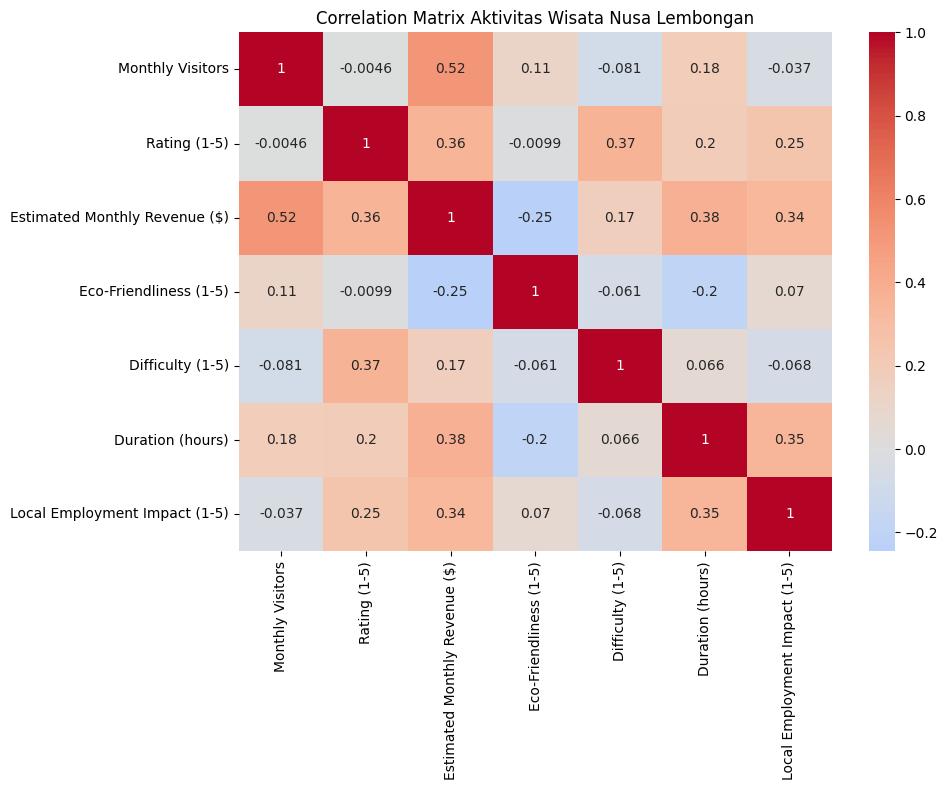

In [22]:
# Membuat correlation matrix
correlation_matrix = df_num.corr()

# Visualisasi dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Aktivitas Wisata Nusa Lembongan')
plt.tight_layout()
plt.show()

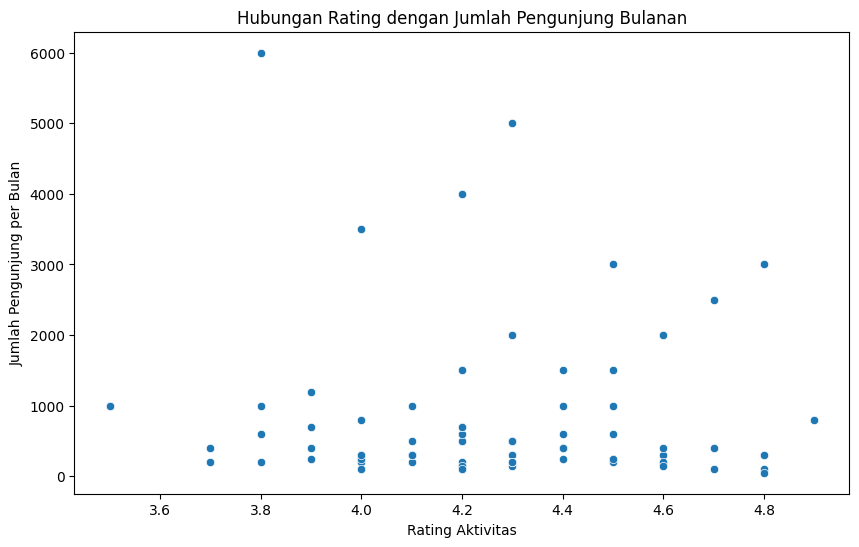

In [23]:
# Membuat scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Rating (1-5)', y='Monthly Visitors')
plt.title('Hubungan Rating dengan Jumlah Pengunjung Bulanan')
plt.xlabel('Rating Aktivitas')
plt.ylabel('Jumlah Pengunjung per Bulan')
plt.show()

Data Preparation

In [27]:
# Melihat missing values pada data
print("Jumlah Missing Values pada setiap kolom:")
print(df.isnull().sum())

# Mengisi missing values dengan nilai median
numeric_columns = ['Monthly Visitors', 'Rating (1-5)', 'Estimated Monthly Revenue ($)',
                  'Eco-Friendliness (1-5)', 'Difficulty (1-5)', 'Duration (hours)',
                  'Local Employment Impact (1-5)']

for col in numeric_columns:
    median = df[col].median()
    df[col].fillna(median, inplace=True)

# Cek kembali missing values
print("\nJumlah Missing Values setelah diisi:")
print(df.isnull().sum())

Jumlah Missing Values pada setiap kolom:
Activity                         0
Category                         0
Monthly Visitors                 1
Rating (1-5)                     1
Estimated Monthly Revenue ($)    1
Peak Season                      0
Eco-Friendliness (1-5)           1
Difficulty (1-5)                 1
Duration (hours)                 1
Local Employment Impact (1-5)    1
dtype: int64

Jumlah Missing Values setelah diisi:
Activity                         0
Category                         0
Monthly Visitors                 0
Rating (1-5)                     0
Estimated Monthly Revenue ($)    0
Peak Season                      0
Eco-Friendliness (1-5)           0
Difficulty (1-5)                 0
Duration (hours)                 0
Local Employment Impact (1-5)    0
dtype: int64


/var/folders/hl/1bfl1jm52gvfs9kr1wrnbw6h0000gn/T/ipykernel_53062/2393275793.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median, inplace=True)
/var/folders/hl/1bfl1jm52gvfs9kr1wrnbw6h0000gn/T/ipykernel_53062/2393275793.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [28]:
# Melihat jumlah data sebelum menghapus duplikat
print("Jumlah data sebelum menghapus duplikat:", len(df))

# Menghapus data duplikat
df.drop_duplicates(inplace=True)

# Melihat jumlah data setelah menghapus duplikat
print("Jumlah data setelah menghapus duplikat:", len(df))

Jumlah data sebelum menghapus duplikat: 74
Jumlah data setelah menghapus duplikat: 74


In [29]:
# Import library untuk encoding
from sklearn.preprocessing import OneHotEncoder

# Melakukan encoding pada kolom kategorikal
categorical_columns = ['Category', 'Peak Season']
encoder = OneHotEncoder(sparse_output=False)

# Encode data kategorikal
encoded_data = encoder.fit_transform(df[categorical_columns])
encoded_df = pd.DataFrame(encoded_data, 
                         columns=encoder.get_feature_names_out(categorical_columns))

# Menggabungkan hasil encoding dengan dataset asli
df_encoded = pd.concat([df.drop(categorical_columns, axis=1), encoded_df], axis=1)

# Melihat hasil encoding
print("\nHasil Encoding:")
print(df_encoded.head())


Hasil Encoding:
                          Activity  Monthly Visitors  Rating (1-5)  \
0                       ----------             400.0           4.2   
1       Snorkeling at Manta Point             3000.0           4.8   
2          Surfing at Playgrounds             1500.0           4.5   
3          Dream Beach Relaxation             5000.0           4.3   
4  Cliff Jumping at Devil's Tears             2000.0           4.6   

   Estimated Monthly Revenue ($)  Eco-Friendliness (1-5)  Difficulty (1-5)  \
0                        20000.0                     5.0               2.0   
1                       150000.0                     4.0               2.0   
2                        75000.0                     5.0               4.0   
3                       100000.0                     5.0               1.0   
4                        40000.0                     4.0               5.0   

   Duration (hours)  Local Employment Impact (1-5)  Category_----------  \
0               2.

In [30]:
from sklearn.preprocessing import MinMaxScaler

# Memilih kolom yang akan dinormalisasi
columns_to_normalize = ['Monthly Visitors', 'Estimated Monthly Revenue ($)', 
                       'Duration (hours)']

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Membuat copy dataset
df_norm = df_encoded.copy()

# Melakukan normalisasi
df_norm[columns_to_normalize] = scaler.fit_transform(df_norm[columns_to_normalize])

# Melihat hasil normalisasi
print("\nHasil Normalisasi:")
print(df_norm[columns_to_normalize].describe())


Hasil Normalisasi:
       Monthly Visitors  Estimated Monthly Revenue ($)  Duration (hours)
count         74.000000                      74.000000         74.000000
mean           0.132523                       0.148767          0.294595
std            0.191462                       0.171496          0.206443
min            0.000000                       0.000000          0.000000
25%            0.025210                       0.045226          0.200000
50%            0.058824                       0.095477          0.200000
75%            0.151261                       0.174623          0.333333
max            1.000000                       1.000000          1.000000


In [31]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi StandardScaler
standard_scaler = StandardScaler()

# Membuat copy dataset
df_stand = df_encoded.copy()

# Melakukan standardisasi
df_stand[columns_to_normalize] = standard_scaler.fit_transform(df_stand[columns_to_normalize])

# Melihat hasil standardisasi
print("\nHasil Standardisasi:")
print(df_stand[columns_to_normalize].describe())


Hasil Standardisasi:
       Monthly Visitors  Estimated Monthly Revenue ($)  Duration (hours)
count      7.400000e+01                   7.400000e+01      7.400000e+01
mean      -1.500301e-17                  -2.550512e-17     -9.601929e-17
std        1.006826e+00                   1.006826e+00      1.006826e+00
min       -6.968888e-01                  -8.733917e-01     -1.436742e+00
25%       -5.643187e-01                  -6.078758e-01     -4.613391e-01
50%       -3.875586e-01                  -3.128582e-01     -4.613391e-01
75%        9.853184e-02                   1.517945e-01      1.889293e-01
max        4.561726e+00                   4.997459e+00      3.440271e+00


In [32]:
# Menyimpan dataset hasil preparasi
df_norm.to_csv('nusa_lembongan_prepared.csv', index=False)
print("\nDataset telah disimpan sebagai 'nusa_lembongan_prepared.csv'")


Dataset telah disimpan sebagai 'nusa_lembongan_prepared.csv'


Data Modelling - Regresi

In [34]:
# Import library untuk regresi
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

# Install and import statsmodels
%pip install statsmodels
import statsmodels.formula.api as smf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 1.6 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 823.5 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip3.10 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [35]:
# Memilih feature dan target
X = df[['Monthly Visitors', 'Rating (1-5)', 'Eco-Friendliness (1-5)', 
        'Duration (hours)', 'Local Employment Impact (1-5)']]
y = df['Estimated Monthly Revenue ($)']

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

print("Ukuran data training:", X_train.shape)
print("Ukuran data testing:", X_test.shape)

Ukuran data training: (51, 5)
Ukuran data testing: (23, 5)


In [36]:
# Membuat dan melatih model
model = LinearRegression()
model.fit(X_train, y_train)

# Melihat koefisien dan intercept
print("\nKoefisien model:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")
print(f"\nIntercept: {model.intercept_:.2f}")


Koefisien model:
Monthly Visitors: 16.48
Rating (1-5): 36733.43
Eco-Friendliness (1-5): -11413.39
Duration (hours): 992.88
Local Employment Impact (1-5): 12975.63

Intercept: -134794.62


In [37]:
# Melakukan prediksi
predictions = model.predict(X_test)

# Menghitung metrik evaluasi
print("\nMetrik Evaluasi Model:")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 Score:', metrics.r2_score(y_test, predictions))

# Membuat DataFrame perbandingan nilai aktual vs prediksi
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
results_df['Error'] = results_df['Actual'] - results_df['Predicted']
print("\nPerbandingan Nilai Aktual vs Prediksi:")
print(results_df.head())


Metrik Evaluasi Model:
Mean Absolute Error: 15520.898791409187
Mean Squared Error: 325498513.61452216
Root Mean Squared Error: 18041.577359380808
R2 Score: 0.29742263817512893

Perbandingan Nilai Aktual vs Prediksi:
      Actual     Predicted         Error
4    40000.0  49427.570319  -9427.570319
63    7500.0   7521.566545    -21.566545
18   15000.0  22426.244670  -7426.244670
0    20000.0   9924.452560  10075.547440
28  100000.0  76371.718074  23628.281926


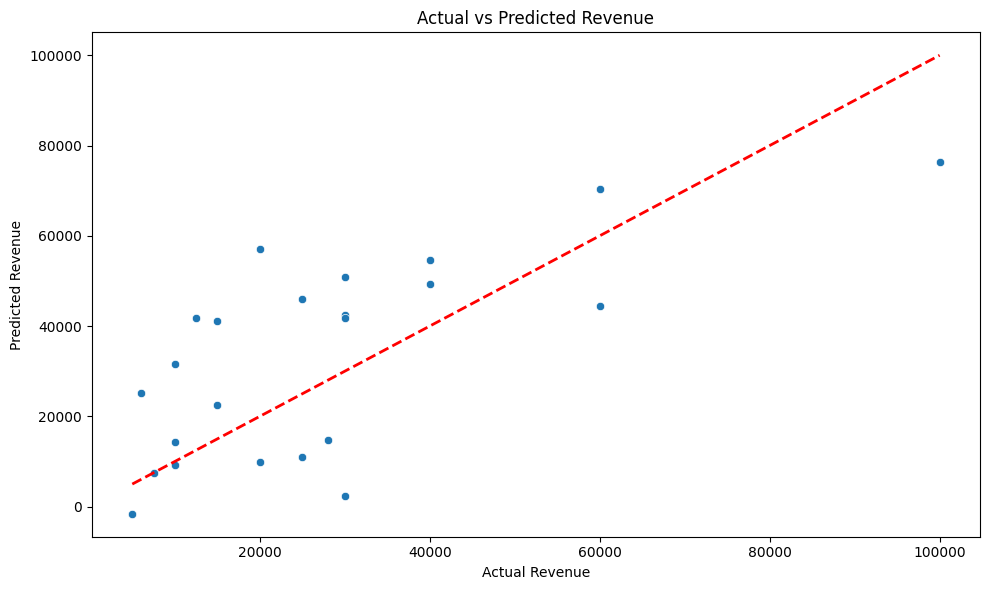

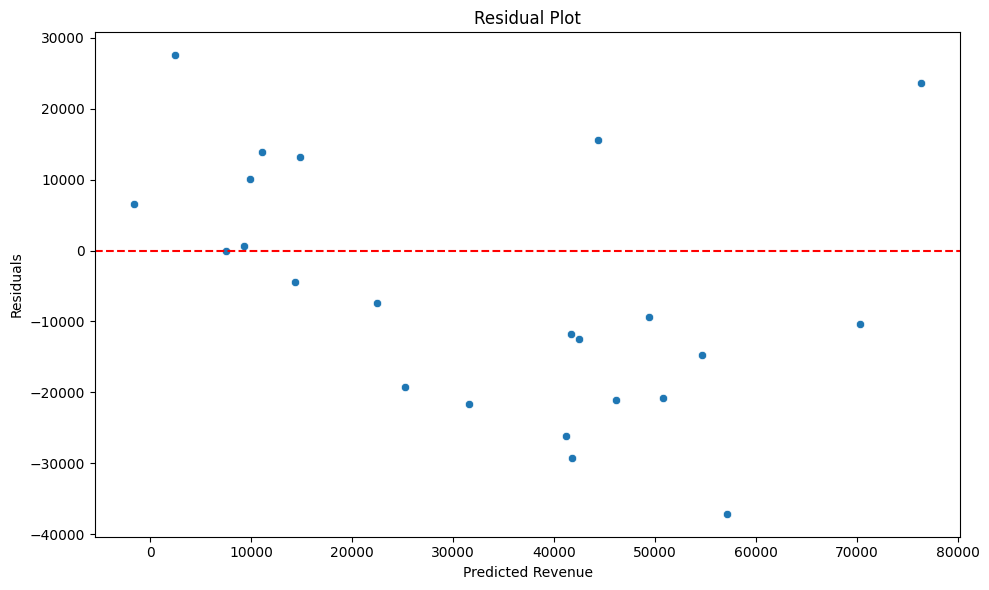

In [38]:
# Membuat scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs Predicted Revenue')
plt.tight_layout()
plt.show()

# Membuat plot residual
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predictions, y=results_df['Error'])
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Revenue')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()

In [39]:
# Membuat contoh data baru
new_data = pd.DataFrame({
    'Monthly Visitors': [2000],
    'Rating (1-5)': [4.5],
    'Eco-Friendliness (1-5)': [4],
    'Duration (hours)': [3],
    'Local Employment Impact (1-5)': [4]
})

# Melakukan prediksi
new_prediction = model.predict(new_data)
print("\nPrediksi pendapatan untuk data baru:")
print(f"Estimated Monthly Revenue: ${new_prediction[0]:,.2f}")


Prediksi pendapatan untuk data baru:
Estimated Monthly Revenue: $72,698.38


In [41]:
# Rename columns to remove spaces and special characters
df.rename(columns={
	'Estimated Monthly Revenue ($)': 'Estimated_Monthly_Revenue',
	'Monthly Visitors': 'Monthly_Visitors',
	'Rating (1-5)': 'Rating',
	'Eco-Friendliness (1-5)': 'Eco_Friendliness',
	'Duration (hours)': 'Duration',
	'Local Employment Impact (1-5)': 'Local_Employment_Impact'
}, inplace=True)

# Membuat model menggunakan statsmodels
formula = 'Estimated_Monthly_Revenue ~ Monthly_Visitors + Rating + Eco_Friendliness + Duration + Local_Employment_Impact'
stat_model = smf.ols(formula=formula, data=df).fit()

# Menampilkan summary statistik
print("\nSummary Statistik Model:")
print(stat_model.summary())


Summary Statistik Model:
                                OLS Regression Results                               
Dep. Variable:     Estimated_Monthly_Revenue   R-squared:                       0.584
Model:                                   OLS   Adj. R-squared:                  0.553
Method:                        Least Squares   F-statistic:                     19.08
Date:                       Mon, 11 Nov 2024   Prob (F-statistic):           8.20e-12
Time:                               14:52:17   Log-Likelihood:                -844.46
No. Observations:                         74   AIC:                             1701.
Df Residuals:                             68   BIC:                             1715.
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------

data modeling classification

In [44]:
# Import library tambahan untuk klasifikasi
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat target klasifikasi berdasarkan revenue
df['Revenue_Class'] = pd.qcut(df['Estimated_Monthly_Revenue'], 
                            q=3, 
                            labels=['Low', 'Medium', 'High'])

# Memilih feature untuk klasifikasi
features = ['Monthly_Visitors', 'Rating', 'Eco_Friendliness',
           'Difficulty (1-5)', 'Local_Employment_Impact']
X = df[features]
y = df['Revenue_Class']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

print("Distribusi kelas target:")
print(df['Revenue_Class'].value_counts())

Distribusi kelas target:
Revenue_Class
Medium    28
Low       25
High      21
Name: count, dtype: int64



Hasil Evaluasi Decision Tree:

Confusion Matrix:
[[3 0 2]
 [0 6 1]
 [2 3 6]]

Classification Report:
              precision    recall  f1-score   support

        High       0.60      0.60      0.60         5
         Low       0.67      0.86      0.75         7
      Medium       0.67      0.55      0.60        11

    accuracy                           0.65        23
   macro avg       0.64      0.67      0.65        23
weighted avg       0.65      0.65      0.65        23



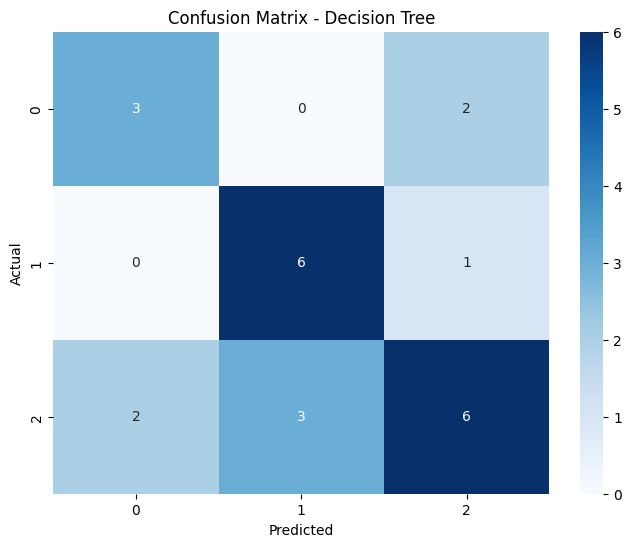

In [45]:
# Membuat dan melatih model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Melakukan prediksi
dt_predictions = dt_model.predict(X_test)

# Evaluasi model
print("\nHasil Evaluasi Decision Tree:")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, dt_predictions))
print("\nClassification Report:")
print(classification_report(y_test, dt_predictions))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, dt_predictions), 
            annot=True, 
            fmt='d', 
            cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


Hasil Evaluasi Naive Bayes:

Confusion Matrix:
[[3 0 2]
 [0 5 2]
 [2 4 5]]

Classification Report:
              precision    recall  f1-score   support

        High       0.60      0.60      0.60         5
         Low       0.56      0.71      0.62         7
      Medium       0.56      0.45      0.50        11

    accuracy                           0.57        23
   macro avg       0.57      0.59      0.58        23
weighted avg       0.57      0.57      0.56        23



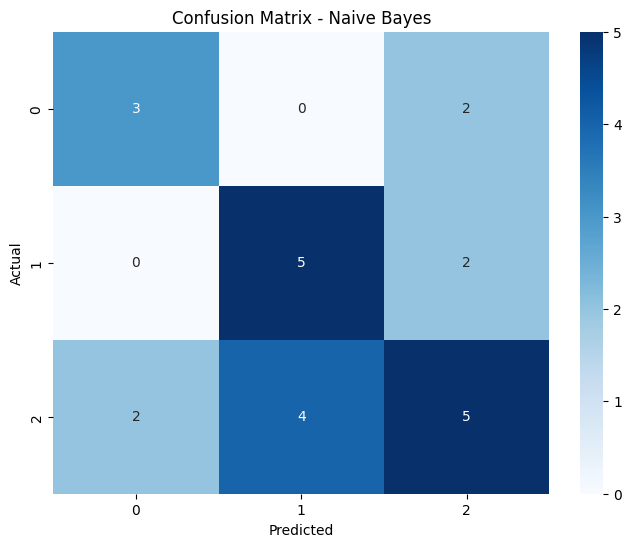

In [46]:
# Membuat dan melatih model Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Melakukan prediksi
nb_predictions = nb_model.predict(X_test)

# Evaluasi model
print("\nHasil Evaluasi Naive Bayes:")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, nb_predictions))
print("\nClassification Report:")
print(classification_report(y_test, nb_predictions))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, nb_predictions), 
            annot=True, 
            fmt='d', 
            cmap='Blues')
plt.title('Confusion Matrix - Naive Bayes')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [47]:
# Membuat DataFrame perbandingan
comparison = pd.DataFrame({
    'Decision Tree': [metrics.accuracy_score(y_test, dt_predictions),
                     metrics.precision_score(y_test, dt_predictions, average='weighted'),
                     metrics.recall_score(y_test, dt_predictions, average='weighted'),
                     metrics.f1_score(y_test, dt_predictions, average='weighted')],
    'Naive Bayes': [metrics.accuracy_score(y_test, nb_predictions),
                    metrics.precision_score(y_test, nb_predictions, average='weighted'),
                    metrics.recall_score(y_test, nb_predictions, average='weighted'),
                    metrics.f1_score(y_test, nb_predictions, average='weighted')]
}, index=['Accuracy', 'Precision', 'Recall', 'F1-Score'])

print("\nPerbandingan Performa Model:")
print(comparison)


Perbandingan Performa Model:
           Decision Tree  Naive Bayes
Accuracy        0.652174     0.565217
Precision       0.652174     0.565217
Recall          0.652174     0.565217
F1-Score        0.645652     0.559783


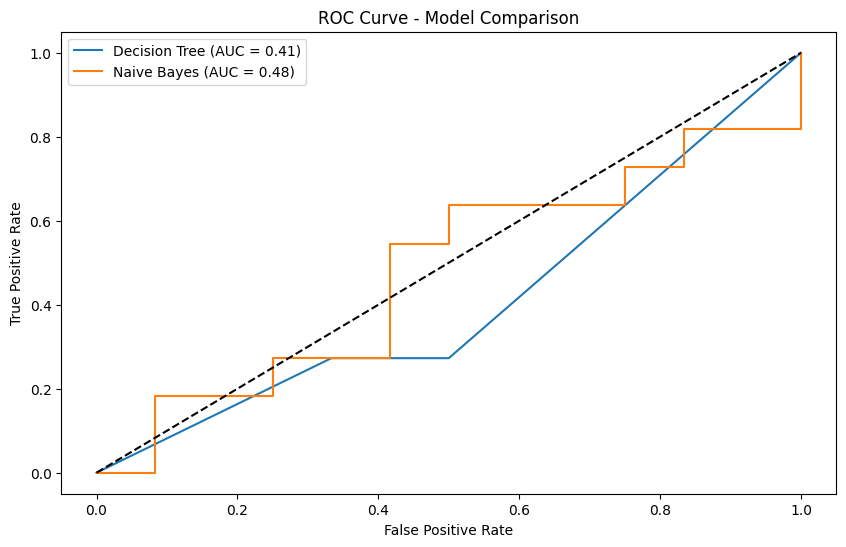

In [48]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Membuat ROC Curve
plt.figure(figsize=(10, 6))

# Decision Tree
dt_probs = dt_model.predict_proba(X_test)
fpr_dt = dict()
tpr_dt = dict()
roc_auc_dt = dict()

# Naive Bayes
nb_probs = nb_model.predict_proba(X_test)
fpr_nb = dict()
tpr_nb = dict()
roc_auc_nb = dict()

# Menghitung ROC curve dan ROC area untuk setiap kelas
for i in range(3):  # 3 classes
    fpr_dt[i], tpr_dt[i], _ = roc_curve(label_binarize(y_test, classes=['Low', 'Medium', 'High'])[:, i], dt_probs[:, i])
    roc_auc_dt[i] = auc(fpr_dt[i], tpr_dt[i])
    
    fpr_nb[i], tpr_nb[i], _ = roc_curve(label_binarize(y_test, classes=['Low', 'Medium', 'High'])[:, i], nb_probs[:, i])
    roc_auc_nb[i] = auc(fpr_nb[i], tpr_nb[i])

# Plot ROC curves
plt.plot(fpr_dt[1], tpr_dt[1], label=f'Decision Tree (AUC = {roc_auc_dt[1]:.2f})')
plt.plot(fpr_nb[1], tpr_nb[1], label=f'Naive Bayes (AUC = {roc_auc_nb[1]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Model Comparison')
plt.legend()
plt.show()

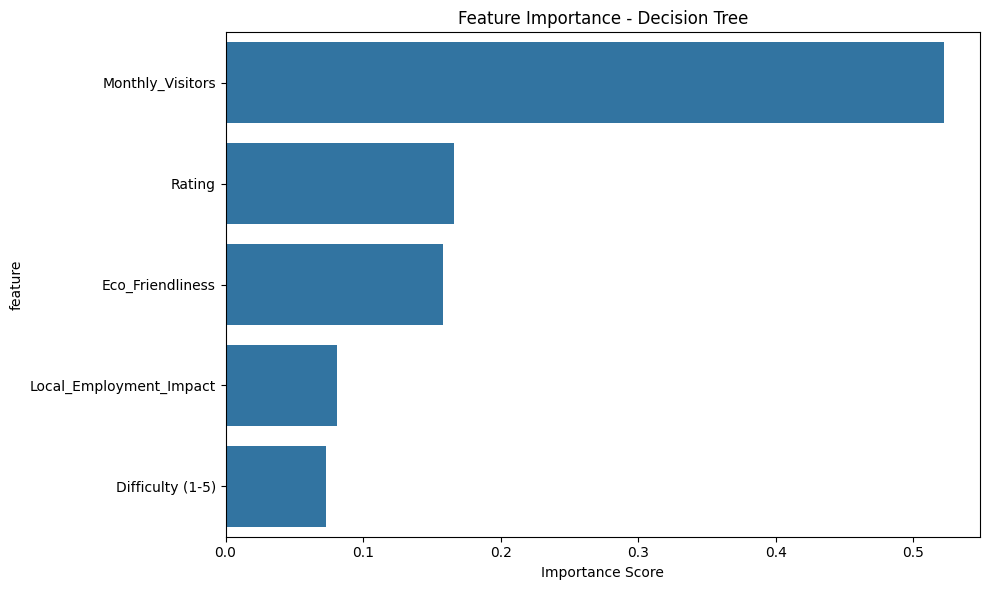

In [49]:
# Visualisasi feature importance
importance = pd.DataFrame({
    'feature': features,
    'importance': dt_model.feature_importances_
})
importance = importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance, x='importance', y='feature')
plt.title('Feature Importance - Decision Tree')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

Data Modeling - Clustering

In [51]:
# Import library tambahan untuk clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Memilih feature untuk clustering
cluster_features = ['Monthly_Visitors', 'Rating', 
                   'Estimated_Monthly_Revenue', 'Local_Employment_Impact']
X_cluster = df[cluster_features]

# Standardisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)
X_scaled = pd.DataFrame(X_scaled, columns=cluster_features)

print("Data setelah standardisasi:")
print(X_scaled.describe())

Data setelah standardisasi:
       Monthly_Visitors        Rating  Estimated_Monthly_Revenue  \
count      7.400000e+01  7.400000e+01               7.400000e+01   
mean      -1.500301e-17 -3.122127e-15              -2.550512e-17   
std        1.006826e+00  1.006826e+00               1.006826e+00   
min       -6.968888e-01 -2.520509e+00              -8.733917e-01   
25%       -5.643187e-01 -7.781286e-01              -6.078758e-01   
50%       -3.875586e-01 -1.973352e-01              -3.128582e-01   
75%        9.853184e-02  7.983106e-01               1.517945e-01   
max        4.561726e+00  2.125838e+00               4.997459e+00   

       Local_Employment_Impact  
count             7.400000e+01  
mean              2.115425e-16  
std               1.006826e+00  
min              -1.444303e+00  
25%              -3.537069e-01  
50%              -3.537069e-01  
75%               7.368895e-01  
max               1.827486e+00  


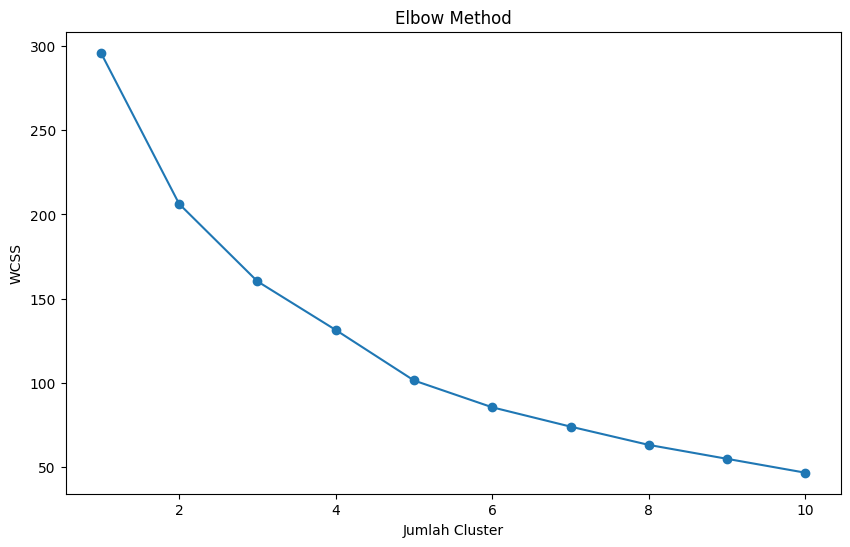

In [52]:
# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', 
                    max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

In [53]:
from sklearn.metrics import silhouette_score

# Menghitung Silhouette Score untuk berbagai jumlah cluster
print("\nSilhouette Scores:")
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster, random_state=42).fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    print(f'Untuk n_clusters = {n_cluster}, Silhouette Score = {score:.3f}')


Silhouette Scores:
Untuk n_clusters = 2, Silhouette Score = 0.309
Untuk n_clusters = 3, Silhouette Score = 0.290
Untuk n_clusters = 4, Silhouette Score = 0.287
Untuk n_clusters = 5, Silhouette Score = 0.310
Untuk n_clusters = 6, Silhouette Score = 0.335
Untuk n_clusters = 7, Silhouette Score = 0.335
Untuk n_clusters = 8, Silhouette Score = 0.307
Untuk n_clusters = 9, Silhouette Score = 0.328
Untuk n_clusters = 10, Silhouette Score = 0.287


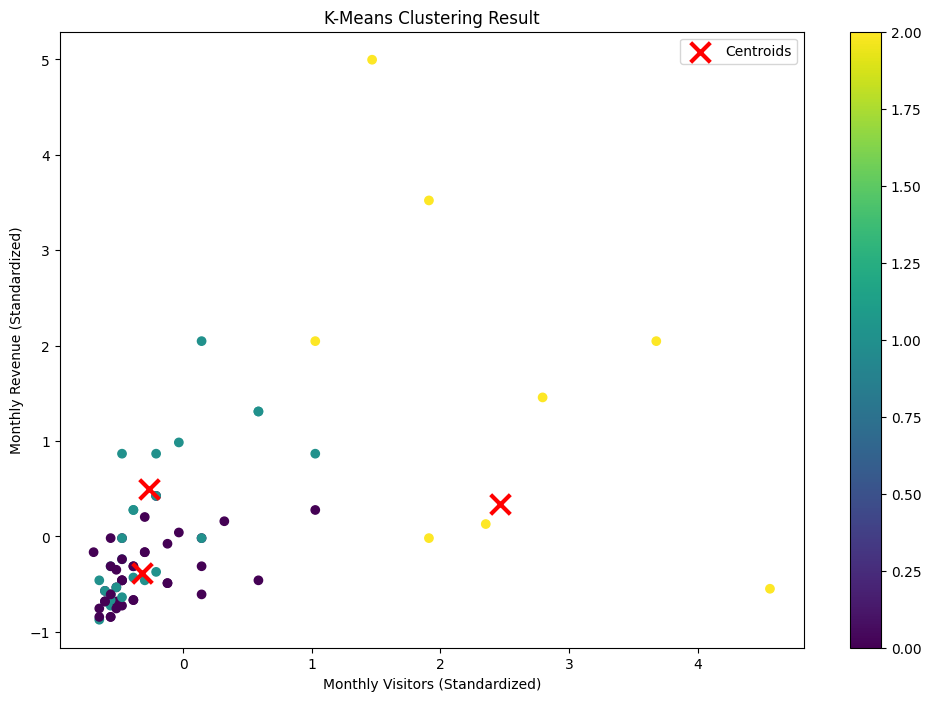

In [55]:
# Implementasi K-Means dengan jumlah cluster optimal
n_clusters = 3  # Sesuaikan dengan hasil analisis
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Menambahkan label cluster ke dataset
df['Cluster'] = cluster_labels

# Visualisasi hasil clustering (menggunakan 2 feature utama)
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_scaled['Monthly_Visitors'], 
                     X_scaled['Estimated_Monthly_Revenue'],
                     c=cluster_labels, 
                     cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            c='red', 
            marker='x', 
            s=200, 
            linewidth=3, 
            label='Centroids')
plt.title('K-Means Clustering Result')
plt.xlabel('Monthly Visitors (Standardized)')
plt.ylabel('Monthly Revenue (Standardized)')
plt.legend()
plt.colorbar(scatter)
plt.show()

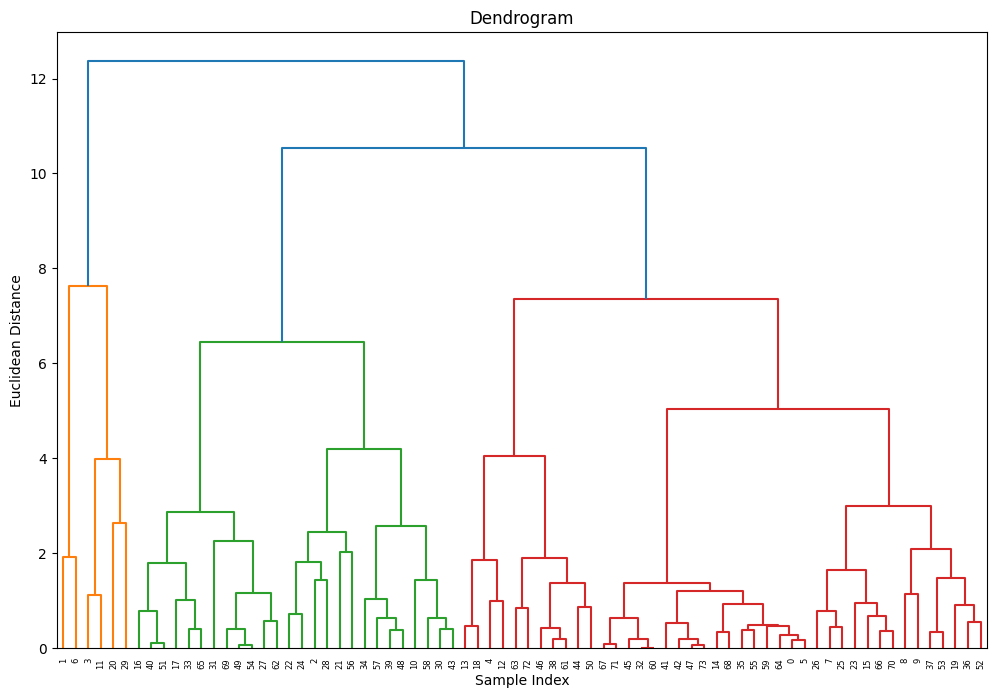

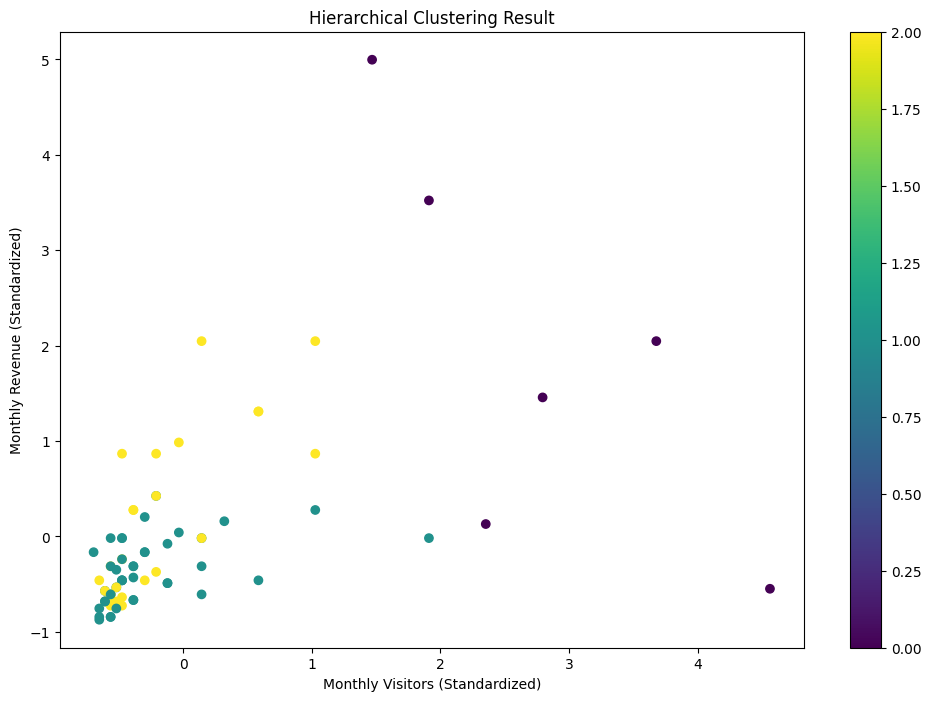

In [58]:
# Membuat dendrogram
plt.figure(figsize=(12, 8))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')
plt.show()

# Implementasi Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
hc_labels = hc.fit_predict(X_scaled)

# Visualisasi hasil Hierarchical Clustering
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_scaled['Monthly_Visitors'], 
                     X_scaled['Estimated_Monthly_Revenue'],
                     c=hc_labels, 
                     cmap='viridis')
plt.title('Hierarchical Clustering Result')
plt.xlabel('Monthly Visitors (Standardized)')
plt.ylabel('Monthly Revenue (Standardized)')
plt.colorbar(scatter)
plt.show()

In [59]:
# Analisis statistik untuk setiap cluster
print("\nKarakteristik Cluster:")
for i in range(n_clusters):
    print(f"\nCluster {i}:")
    cluster_data = df[df['Cluster'] == i][cluster_features]
    print(cluster_data.describe())
    print(f"Jumlah aktivitas dalam cluster: {len(cluster_data)}")


Karakteristik Cluster:

Cluster 0:
       Monthly_Visitors     Rating  Estimated_Monthly_Revenue  \
count         40.000000  40.000000                   40.00000   
mean         475.000000   4.142500                17675.00000   
std          412.776714   0.270695                11256.22335   
min           50.000000   3.500000                 2000.00000   
25%          200.000000   4.000000                 8000.00000   
50%          300.000000   4.150000                15000.00000   
75%          625.000000   4.300000                25000.00000   
max         2000.000000   4.800000                45000.00000   

       Local_Employment_Impact  
count                40.000000  
mean                  2.750000  
std                   0.543021  
min                   2.000000  
25%                   2.000000  
50%                   3.000000  
75%                   3.000000  
max                   4.000000  
Jumlah aktivitas dalam cluster: 40

Cluster 1:
       Monthly_Visitors     Rating

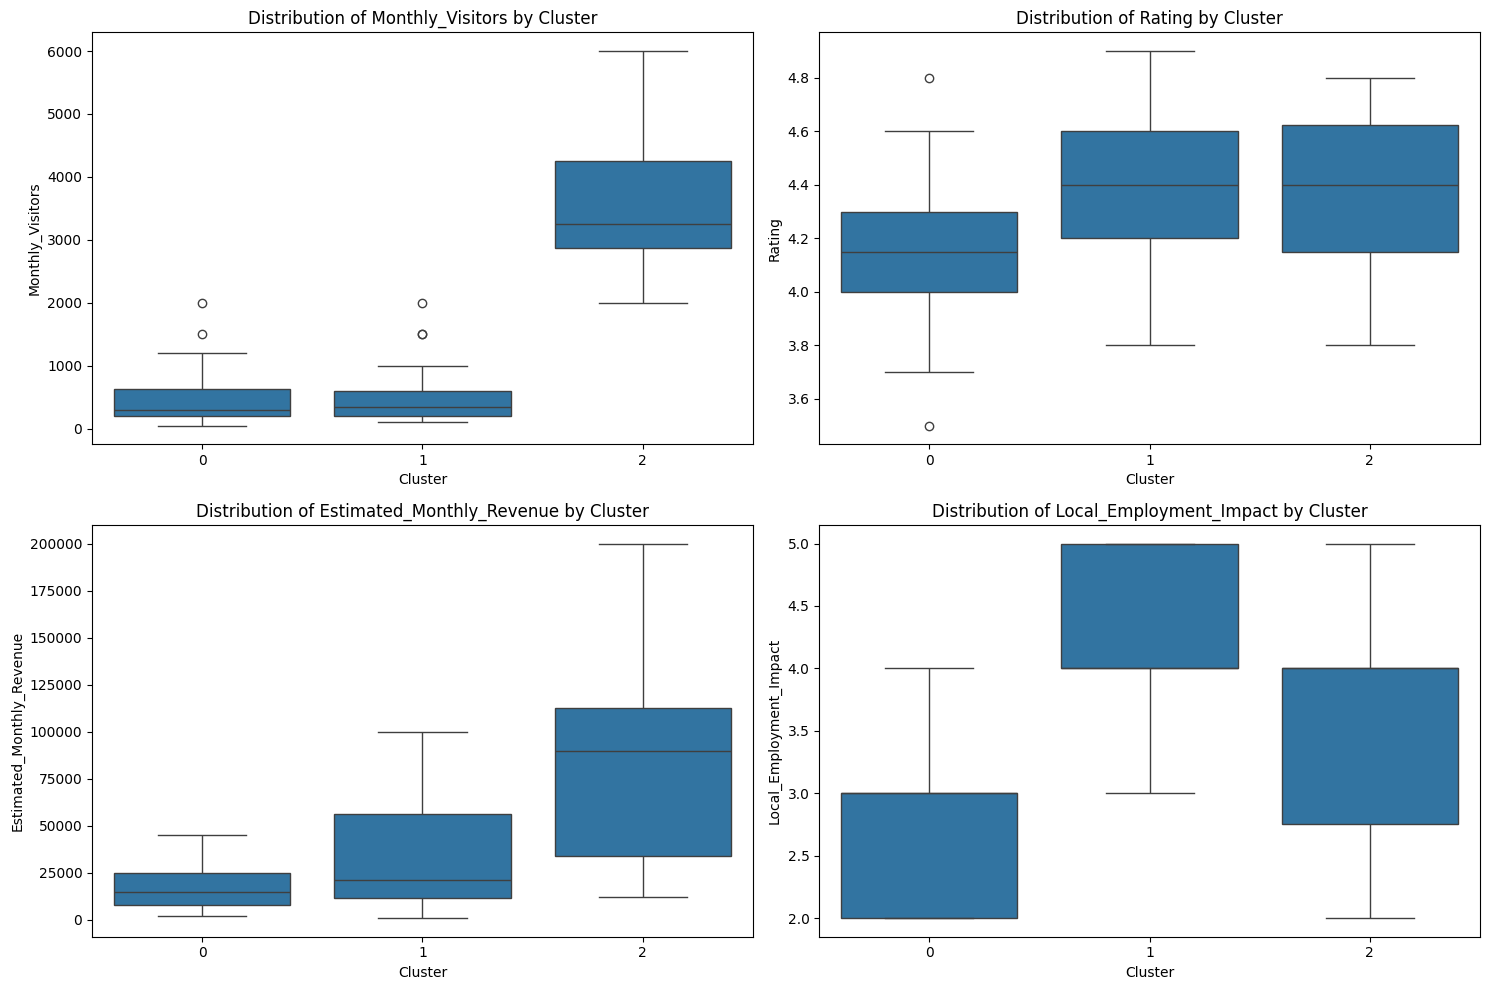

In [60]:
# Membuat box plot untuk setiap feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(cluster_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Cluster', y=feature, data=df)
    plt.title(f'Distribution of {feature} by Cluster')
plt.tight_layout()
plt.show()